# Perceptron

In [16]:
from IPython.display import Image
import torch
import polars as pl
import os


In [19]:
device = 'cpu'
project_directory = os.getcwd()

In [24]:
data = pl.read_csv( project_directory + '/data/OR.csv')

In [25]:
data.head()

0.99941,-1.0007,1
f64,f64,i64
-0.99501,1.0201,1
1.0057,0.98668,1
-0.9801,-1.0187,-1
1.0025,0.99589,1
0.97311,-1.0292,1


Bib:
Stevens-Antiga, *Deep Learning with Pytorch*.

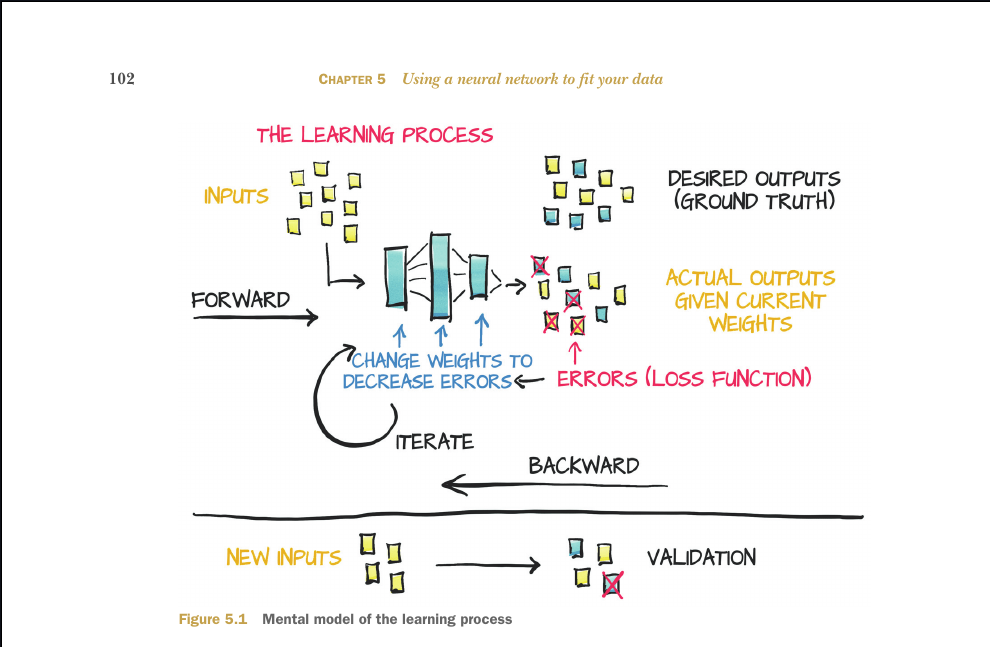

In [3]:

Image('perceptron_learningprocess.png')

Los elementos de una red neuronal simple son:
- capas o 'layers' que constituyen la red (en este caso una sola capa),
- imputs que son los datos de entrada con su correspondiente etiqueta o 'targets'
- la función de pérdida (*loss function*) que permite computar el error del modelo y nos ofrece la señal que se necesita para que la red aprenda,y
- la función de optimización que permite optimizar los párametros del modelo. 

**Ejecicio 1**   

Realice un programa que permita el entrenamiento y prueba de un perceptrón simple con una cantidad variable de entradas. El programa debe proveer las siguientes facilidades:  

-lectura de los patrones de entrenamiento (entradas y salidas) desde un archivo en formato texto separado por comas selección del criterio de finalización del entrenamiento,   
-selección del número máximo de épocas de entrenamiento,   
-selección de la tasa de aprendizaje,   
-prueba del perceptrón entrenado mediante archivos de texto con el mismo formato separado por comas.   

In [26]:
# Read the file
data = torch.tensor(data.to_numpy(), dtype=torch.float32)
print(data)

tensor([[-0.9950,  1.0201,  1.0000],
        [ 1.0057,  0.9867,  1.0000],
        [-0.9801, -1.0187, -1.0000],
        ...,
        [ 1.0113,  1.0148,  1.0000],
        [ 1.0105,  0.9782,  1.0000],
        [-0.9996,  1.0440,  1.0000]])


In [10]:
# testing functions
torch.zeros(2, dtype=torch.float32)

tensor([0., 0.])

In [36]:
# Initialize the weights and bias for the perceptron with random values
num_features = 2
weights = torch.randn(num_features, 1, dtype=torch.float32, device=device)
bias = torch.randn(1, dtype=torch.float32, device=device)
print(weights)
print(bias)

tensor([[ 0.3765],
        [-1.3995]])
tensor([0.6243])


In [44]:
# get features columns
features = data[:, :-1]
target = data[:, 2]
print(features)
print(target)

tensor([[-0.9950,  1.0201],
        [ 1.0057,  0.9867],
        [-0.9801, -1.0187],
        ...,
        [ 1.0113,  1.0148],
        [ 1.0105,  0.9782],
        [-0.9996,  1.0440]])
tensor([ 1.,  1., -1.,  ...,  1.,  1.,  1.])


In [38]:
#Compute the forward pass of the perceptron.
linear = torch.add(torch.mm(features, weights), bias)
print(linear)

tensor([[-1.1780],
        [-0.3779],
        [ 1.6809],
        ...,
        [-0.4151],
        [-0.3642],
        [-1.2131]])


In [39]:
# 
linear > 0.

tensor([[False],
        [False],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [40]:
# tensor prediction 
def tensor_pred(cond, t1, t2):
    return (cond * t1) + ((~(cond)) * t2)

In [47]:
predictions  = tensor_pred(linear > 0, 1, -1).float()
print(predictions)

tensor([[-1.],
        [-1.],
        [ 1.],
        ...,
        [-1.],
        [-1.],
        [-1.]])


In [49]:
# backprogation
errors =  target - predictions
print(errors)

tensor([[ 2.,  2.,  0.,  ...,  2.,  2.,  2.],
        [ 2.,  2.,  0.,  ...,  2.,  2.,  2.],
        [ 0.,  0., -2.,  ...,  0.,  0.,  0.],
        ...,
        [ 2.,  2.,  0.,  ...,  2.,  2.,  2.],
        [ 2.,  2.,  0.,  ...,  2.,  2.,  2.],
        [ 2.,  2.,  0.,  ...,  2.,  2.,  2.]])
